In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import all the csv files
def import_csv(file):    
    return pd.read_csv(
        file,
        delimiter=';',
        error_bad_lines=False,
        encoding='ISO-8859–1',
        header=0
    )

In [3]:
ratings_df = import_csv('BX-Book-Ratings.csv')
books_df = import_csv('BX-Books.csv')
users_df = import_csv('BX-Users.csv')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Users/saml/anaconda3/lib/python3.7/site-packages/IPython/core/interactive

In [4]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
ratings_df.sort_values(by='Book-Rating', ascending=False).head()

,User-ID,ISBN,Book-Rating
714920,173291,0590460609,10
439695,105221,0590353403,10
439659,105214,1573220221,10
113491,26421,1558743669,10
439664,105221,0064407667,10


In [6]:
# Nr of users
ratings_df['User-ID'].unique().shape

(105283,)

In [7]:
# Nr of nan's
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [8]:
# Ratings range
np.sort(ratings_df['Book-Rating'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
# Types
ratings_df.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

---

In [10]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [12]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271359 non-null object
Year-Of-Publication    271360 non-null object
Publisher              271358 non-null object
Image-URL-S            271360 non-null object
Image-URL-M            271360 non-null object
Image-URL-L            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
books_df = books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)
books_df[books_df.isna().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [14]:
# Manually writing the name of author (Google)
books_df.loc[187689,'Book-Author'] = 'David Tait'
books_df[books_df.ISBN == '9627982032']  # checking if the name has been changed correctly 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,David Tait,1995,Edinburgh Financial Publishing


---

In [15]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [17]:
users_df.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [18]:
locations = users_df.Location
locations.head()

0                    nyc, new york, usa
1             stockton, california, usa
2       moscow, yukon territory, russia
3             porto, v.n.gaia, portugal
4    farnborough, hants, united kingdom
Name: Location, dtype: object

In [19]:
# city name
import re

cities = []
for line in locations:
    for city in re.findall('^\w+[\s*\w*]*', line):
        cities.append(city)

cities[:10]

['nyc',
 'stockton',
 'moscow',
 'porto',
 'farnborough',
 'santa monica',
 'washington',
 'timmins',
 'germantown',
 'albacete']

In [20]:
cities = pd.Series(cities)
print(cities.isna().sum())
print(cities.shape)
print(cities.head(30))

0
(278501,)
0                nyc
1           stockton
2             moscow
3              porto
4        farnborough
5       santa monica
6         washington
7            timmins
8         germantown
9           albacete
10         melbourne
11        fort bragg
12         barcelona
13        mediapolis
14           calgary
15       albuquerque
16        chesapeake
17    rio de janeiro
18            weston
19         langhorne
20           ferrol 
21            erfurt
22      philadelphia
23           cologne
24           oakland
25          bellevue
26           chicago
27          freiburg
28        cuernavaca
29         anchorage
dtype: object


We cannot use the "cities" Series since some of the values are missing or are not in a correct format. :/

In [21]:
users_df = users_df.drop(['Age', 'Location'], axis=1)

In [22]:
users_df['User-ID'].shape

(278858,)

In [23]:
data = pd.merge(books_df, ratings_df, on='ISBN')
data = data.merge(users_df, how='inner', on='User-ID')
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0


In [24]:
data.shape

(1031136, 7)

In [25]:
# drop users with less than 50 reviews
counter = data['User-ID'].value_counts()
data = data[data['User-ID'].isin(counter[counter > 50].index)]
data.shape

(687966, 7)

In [26]:
# drop books with less than 50 ratings
counter = data['ISBN'].value_counts()
data = data[data['ISBN'].isin(counter[counter > 50].index)]
data.shape

(96543, 7)

In [27]:
data.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Book-Rating            0
dtype: int64

In [28]:
data['Rating-Count'] = data.groupby('ISBN')['Book-Rating'].transform('count')
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Rating-Count
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9,197
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,6,90
21,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400,0,226
22,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400,7,335
23,0446364193,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,11400,0,187


In [29]:
data['Rating-Count'].max()

772

In [30]:
data['Rating-Count'].min()

51

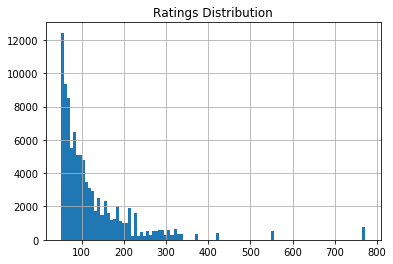

In [31]:
data['Rating-Count'].hist(bins=100)
plt.title('Ratings Distribution')
plt.show()

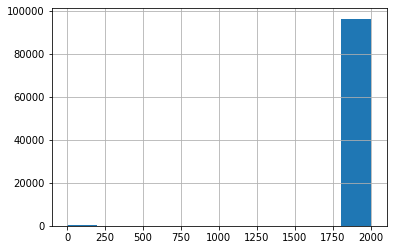

In [32]:
data['Year-Of-Publication'].hist(bins=10)

As we can see, there are some 0 values for the publishing year which means we need to resolve before we will be able to use this column.
And since this dataset is from 2004, any year after 2004 should be a mistake.

In [33]:
data['Year-Of-Publication'].unique()

array([2003, 2002, 1998, 1993, 1999, 1992, 1989, 2000, 2001, 1996, 1994,
       2004, 1997, 1988, 1983, 1991, 1995, 1990, 1976, 1965, 1986, 1987,
       1982, 1978, 0, 1959, 1984, 1985, 1980, 1974, 1981, 1971],
      dtype=object)

In [34]:
data.loc[(data['Year-Of-Publication'] > 2005) | (data['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.NAN
data['Year-Of-Publication'].fillna(round(data['Year-Of-Publication'].mean()), inplace=True)
data['Year-Of-Publication'] = data['Year-Of-Publication'].astype(np.int32)
data['Year-Of-Publication'].unique()

array([2003, 2002, 1998, 1993, 1999, 1992, 1989, 2000, 2001, 1996, 1994,
       2004, 1997, 1988, 1983, 1991, 1995, 1990, 1976, 1965, 1986, 1987,
       1982, 1978, 1959, 1984, 1985, 1980, 1974, 1981, 1971])

In [35]:
data.loc[data['Rating-Count'].idxmax()]

ISBN                     0971880107
Book-Title              Wild Animus
Book-Author            Rich Shapero
Year-Of-Publication            2004
Publisher                   Too Far
User-ID                       11676
Book-Rating                       6
Rating-Count                    772
Name: 88, dtype: object

In [36]:
data.nlargest(10, 'Year-Of-Publication')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Rating-Count
88,0971880107,Wild Animus,Rich Shapero,2004,Too Far,11676,6,772
182,0451526341,Animal Farm,George Orwell,2004,Signet,11676,10,78
277,0425182878,Chosen Prey,John Sandford,2004,Berkley Publishing Group,11676,9,83
372,0451155750,The Dead Zone,Stephen King,2004,Signet Book,11676,0,52
526,0385510438,The Last Juror,John Grisham,2004,Doubleday,11676,0,54
579,0425163385,The Night Crew,John Sandford,2004,Berkley Publishing Group,11676,8,52
750,0451177096,Dolores Claiborne,Stephen King,2004,Signet Book,11676,0,102
763,1592400876,"Eats, Shoots &amp; Leaves: The Zero Tolerance ...",Lynne Truss,2004,Gotham Books,11676,9,81
853,0515135062,Three Fates,Nora Roberts,2004,Jove Books,11676,9,79
985,0425143325,Without Remorse,Tom Clancy,2004,Berkley Publishing Group,11676,0,96


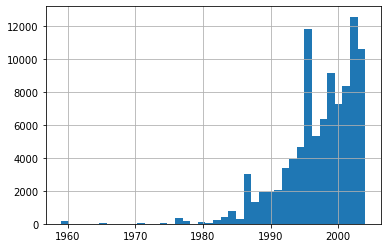

In [37]:
data['Year-Of-Publication'].hist(bins=40)

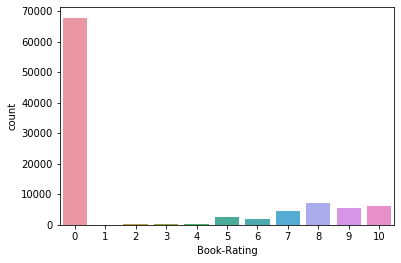

In [38]:
sns.countplot(data=data['Rating-Count'], x=data['Book-Rating'])
plt.show()

As we can see, there are a lot of 0 votings in the dataset.
The explicit ratings represented by **1–10** and implicit ratings represented by **0**.

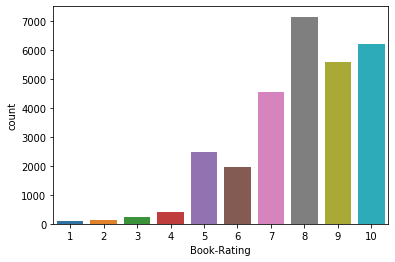

In [39]:
df_explicit = data[data['Book-Rating'] != 0]
df_implicit = data[data['Book-Rating'] == 0]

sns.countplot(data=df_explicit, x='Book-Rating')
plt.show()

In [40]:
df_explicit.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Rating-Count
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9,197
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,6,90
22,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400,7,335
24,0316789089,The Pilot's Wife : A Novel Tag: Author of the ...,Anita Shreve,1999,"Little, Brown",11400,7,60
27,0743418174,Good in Bed,Jennifer Weiner,2002,Washington Square Press,11400,8,259


In [41]:
df_implicit.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Rating-Count
21,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400,0,226
23,0446364193,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,11400,0,187
25,0440211727,A Time to Kill,JOHN GRISHAM,1992,Dell,11400,0,318
26,0553582658,Summer Light,Luanne Rice,2002,Bantam Books,11400,0,59
29,0312305060,The Hours: A Novel,Michael Cunningham,2002,Picador,11400,0,158


In [42]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Rating-Count
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9,197
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,6,90
21,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400,0,226
22,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400,7,335
23,0446364193,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,11400,0,187


### Export to CSV for the model